# Reading CALIOP files

## Final demonstration

In [1]:
from hdf_functions import *

In [2]:
ftest = hdf_to_netcdf('CAL_LID_L3_Cloud_Occurrence-Standard-V1-00.2009-06A.hdf')

## Development of functions

In [23]:
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
# from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from pyhdf.SD import SD, SDC

import xarray as xr
import pandas as pd

In [2]:
# import numpy as np
# import pandas as pd
# import matplotlib.pyplot as plt
# import xarray as xr

In [3]:
# # Import packages
# import os
# import re  # regular expressions
# import warnings
# import matplotlib.pyplot as plt
# import numpy as np
# import numpy.ma as ma
# import rasterio as rio
# from rasterio.plot import plotting_extent
# import geopandas as gpd
# import earthpy as et
# import earthpy.plot as ep
# import earthpy.spatial as es
# import earthpy.mask as em

In [4]:
username = 'jshaw35'
password = 'Sh1tmusic!earthdata'
url = 'https://asdc.larc.nasa.gov/data/CALIPSO/LID_L3_Cloud_Occurrence-Standard-V1-00/2009/CAL_LID_L3_Cloud_Occurrence-Standard-V1-00.2009-03A.hdf'

In [5]:
filename = 'CAL_LID_L3_Cloud_Occurrence-Standard-V1-00.2009-03A.hdf'

### Not sure if this is working

In [9]:
from requests import Session
session = Session()
session.auth = (username, password)
_redirect = session.get(url)
_response = session.get(_redirect.url)
with open(file_name, 'wb') as file:
    file.write(_response._content)


KeyboardInterrupt: 

In [4]:
ls

CAL_LID_L3_Cloud_Occurrence-Standard-V1-00.2009-06A.hdf
file_testing.ipynb


In [5]:
DATAFIELD_NAME = 'Cloud_Accepted_Samples'
FILE_NAME = 'CAL_LID_L3_Cloud_Occurrence-Standard-V1-00.2009-06A.hdf'
hdf = SD(FILE_NAME, SDC.READ)

In [6]:
hdf.attr('CAL_LID_L3_Cloud_Occurrence')

In [7]:
# Read dataset.
DATAFIELD_NAME = 'Temperature_Mean'
data2D = hdf.select(DATAFIELD_NAME)
data = data2D[:,0]

In [8]:
hdf.info()

(35, 1)

In [9]:
# Potentially relevant datasets:
# Longitude_Midpoint
# Latitude_Midpoint
# Altitude_Midpoint
# Pressure_Mean
# Pressure_Standard_Deviation
# Temperature_Mean
# Temperature_Standard_Deviation
# Days_Of_Month_Observed 'latitude', 'longitude'
# 'Cloud_Free_Samples',
#  'Cloud_Samples',
#  'Cloud_Rejected_Samples',
#  'Cloud_Accepted_Samples',
#  'Unknown_Cloud_Transparent_Samples',
#  'Unknown_Cloud_Opaque_Samples',
#  'Water_Cloud_Transparent_Samples',
#  'Water_Cloud_Opaque_Samples',
#  'Ice_Cloud_Transparent_Samples',
#  'Ice_Cloud_Opaque_Samples',

Cloud fraction apparently is:  

cloud_accepted_samples / (cloud_accepted_samples + cloud_rejected_samples + cloud_free_samples)

In [40]:
hdf.datasets()

{'Longitude_Midpoint': (('longitude',), (144,), 5, 0),
 'Latitude_Midpoint': (('latitude',), (85,), 5, 1),
 'Altitude_Midpoint': (('altitude',), (344,), 5, 2),
 'Pressure_Mean': (('latitude', 'longitude', 'altitude'),
  (85, 144, 344),
  5,
  3),
 'Pressure_Standard_Deviation': (('latitude', 'longitude', 'altitude'),
  (85, 144, 344),
  5,
  4),
 'Temperature_Mean': (('latitude', 'longitude', 'altitude'),
  (85, 144, 344),
  5,
  5),
 'Temperature_Standard_Deviation': (('latitude', 'longitude', 'altitude'),
  (85, 144, 344),
  5,
  6),
 'Relative_Humidity_Mean': (('latitude', 'longitude', 'altitude'),
  (85, 144, 344),
  5,
  7),
 'Relative_Humidity_Standard_Deviation': (('latitude',
   'longitude',
   'altitude'),
  (85, 144, 344),
  5,
  8),
 'Tropopause_Height_Mean': (('latitude', 'longitude'), (85, 144), 5, 9),
 'Tropopause_Height_Standard_Deviation': (('latitude', 'longitude'),
  (85, 144),
  5,
  10),
 'DEM_Surface_Elevation_Minimum': (('latitude', 'longitude'),
  (85, 144),
  5,

In [39]:
list(hdf.datasets().keys())

['Longitude_Midpoint',
 'Latitude_Midpoint',
 'Altitude_Midpoint',
 'Pressure_Mean',
 'Pressure_Standard_Deviation',
 'Temperature_Mean',
 'Temperature_Standard_Deviation',
 'Relative_Humidity_Mean',
 'Relative_Humidity_Standard_Deviation',
 'Tropopause_Height_Mean',
 'Tropopause_Height_Standard_Deviation',
 'DEM_Surface_Elevation_Minimum',
 'DEM_Surface_Elevation_Maximum',
 'DEM_Surface_Elevation_Median',
 'Snow_Ice_Surface_Mean',
 'Snow_Ice_Surface_Standard_Deviation',
 'Snow_Ice_Surface_Minimum',
 'Snow_Ice_Surface_Maximum',
 'Snow_Ice_Surface_Median',
 'Land_Surface_Samples',
 'Water_Surface_Samples',
 'Days_Of_Month_Observed',
 'Lidar_Surface_Subsurface_Samples',
 'Totally_Attenuated_Samples',
 'Cloud_Free_Samples',
 'Cloud_Samples',
 'Cloud_Rejected_Samples',
 'Cloud_Accepted_Samples',
 'Unknown_Cloud_Transparent_Samples',
 'Unknown_Cloud_Opaque_Samples',
 'Water_Cloud_Transparent_Samples',
 'Water_Cloud_Opaque_Samples',
 'Ice_Cloud_Transparent_Samples',
 'Ice_Cloud_Opaque_Sample

In [43]:
attrs["valid_range"]

('0...32767', 3, 4, 9)

In [11]:
DATAFIELD_NAME = 'Cloud_Accepted_Samples'
FILE_NAME = 'CAL_LID_L3_Cloud_Occurrence-Standard-V1-00.2009-06A.hdf'
hdf = SD(FILE_NAME, SDC.READ)
        
# Read dataset.
data2D = hdf.select(DATAFIELD_NAME)
data = data2D[:,:,:]

# Read attributes.
attrs = data2D.attributes(full=1)
fva=attrs["fillvalue"]
_FillValue = fva[0]
ua=attrs["units"]
units = ua[0]

vra=attrs["valid_range"]
vra_str = vra[0]

# Valid attribute is string '0.0...25.0'.
smin, smax = vra_str.split("...")
valid_min = float(smin)
valid_max = float(smax)

invalid = np.logical_or(data > valid_max,
                        data < valid_min)
invalid = np.logical_or(invalid, data == _FillValue)
data = np.where(invalid, np.nan, data)

# Read geolocation datasets.
latitude = hdf.select('Latitude_Midpoint')
lat = latitude[:]

longitude = hdf.select('Longitude_Midpoint')
lon = longitude[:]

altitude = hdf.select('Altitude_Midpoint')
alt = altitude[:]

days_observed = hdf.select('Days_Of_Month_Observed')
days = days_observed[:,:]

temperature = hdf.select('Temperature_Mean')
temp = temperature[:,:,:]

In [44]:
attrs

{'units': ('NoUnits', 0, 4, 7),
 'format': ('Int_16', 1, 4, 6),
 'fillvalue': (-9999, 2, 24, 1),
 'valid_range': ('0...32767', 3, 4, 9)}

In [209]:
%%time
FILE_NAME = 'CAL_LID_L3_Cloud_Occurrence-Standard-V1-00.2009-06A.hdf'
        
datafields = ['Pressure_Mean', 'Pressure_Standard_Deviation',
              'Temperature_Mean', 'Temperature_Standard_Deviation',
              'Cloud_Free_Samples','Cloud_Samples','Cloud_Rejected_Samples',
              'Cloud_Accepted_Samples','Unknown_Cloud_Transparent_Samples',
              'Unknown_Cloud_Opaque_Samples', 'Water_Cloud_Transparent_Samples',
              'Water_Cloud_Opaque_Samples', 'Ice_Cloud_Transparent_Samples',
              'Ice_Cloud_Opaque_Samples',
             ]

# datafields = ['Cloud_Accepted_Samples','Ice_Cloud_Opaque_Samples']

# Open hdf file
hdf = SD(FILE_NAME, SDC.READ)

# Read geolocation datasets (and days observed)
latitude = hdf.select('Latitude_Midpoint')
lat = latitude[:]

longitude = hdf.select('Longitude_Midpoint')
lon = longitude[:]

altitude = hdf.select('Altitude_Midpoint')
alt = altitude[:]

days_observed = hdf.select('Days_Of_Month_Observed')

intdays = validate_field(days_observed) # Coded as a 32bit unsigned int
ndays = vcalc_days(days_observed[:]) # Convert to the actual number of days

var_dict = {}
# Add to variables dictionary
var_dict['Days_Of_Month_Observed'] = (('lat','lon'), days)
var_dict['N_Days_Observed'] = (('lat','lon'), ndays)

for field in datafields:
    # Read dataset.
    data3D = hdf.select(field)
    data = validate_field(data3D)
        
    var_dict[field] = (('lat','lon','alt'), data)
    
# Create dataset
testds = xr.Dataset(
    var_dict,
    coords={
        'lat': lat,
        'lon': lon,
        'alt': alt,  
    },
)

CPU times: user 855 ms, sys: 301 ms, total: 1.16 s
Wall time: 1.76 s


In [214]:
%%time

out = hdf_to_netcdf('CAL_LID_L3_Cloud_Occurrence-Standard-V1-00.2009-06A.hdf')

CPU times: user 853 ms, sys: 324 ms, total: 1.18 s
Wall time: 1.45 s


In [212]:
def hdf_to_netcdf(FILE_NAME):
    '''
    Read from CALIOP hdf file to netcdf format.
    Could take fields as an argument and handle errors better.
    '''
    
    datafields = ['Pressure_Mean', 'Pressure_Standard_Deviation',
              'Temperature_Mean', 'Temperature_Standard_Deviation',
              'Cloud_Free_Samples','Cloud_Samples','Cloud_Rejected_Samples',
              'Cloud_Accepted_Samples','Unknown_Cloud_Transparent_Samples',
              'Unknown_Cloud_Opaque_Samples', 'Water_Cloud_Transparent_Samples',
              'Water_Cloud_Opaque_Samples', 'Ice_Cloud_Transparent_Samples',
              'Ice_Cloud_Opaque_Samples',
             ]

    # datafields = ['Cloud_Accepted_Samples','Ice_Cloud_Opaque_Samples']

    # Open hdf file
    hdf = SD(FILE_NAME, SDC.READ)

    # Read geolocation datasets (and days observed)
    latitude = hdf.select('Latitude_Midpoint')
    lat = latitude[:]

    longitude = hdf.select('Longitude_Midpoint')
    lon = longitude[:]

    altitude = hdf.select('Altitude_Midpoint')
    alt = altitude[:]

    days_observed = hdf.select('Days_Of_Month_Observed')

    intdays = validate_field(days_observed) # Coded as a 32bit unsigned int
    ndays = vcalc_days(days_observed[:]) # Convert to the actual number of days

    var_dict = {}
    # Add to variables dictionary
    var_dict['Days_Of_Month_Observed'] = (('lat','lon'), days)
    var_dict['N_Days_Observed'] = (('lat','lon'), ndays)

    for field in datafields:
        # Read dataset.
        data3D = hdf.select(field)
        data = validate_field(data3D)

        var_dict[field] = (('lat','lon','alt'), data)

    # Create dataset
    ds = xr.Dataset(
        var_dict,
        coords={
            'lat': lat,
            'lon': lon,
            'alt': alt,  
        },
    )
    
    return ds

In [195]:
def calc_days(uint):
    "Return 1 if a>b, otherwise return 0"
    return f'{uint:b}'.count('1')
vcalc_days = np.vectorize(calc_days) # this is so cool!!

In [149]:
def validate_field(hdf_selected):
    
    data = hdf_selected[:] # selects all regardless of the shape?
    #^Tested with: all((hdf_selected[:,:] == hdf_selected[:]).flatten()), so good I think
    
    # Read attributes.
    attrs = hdf_selected.attributes(full=1)

    # Get fill values
    fva=attrs["fillvalue"]
    _FillValue = fva[0]

    # Get units
    ua=attrs["units"]
    units = ua[0]

    # Get valid range
    vra=attrs["valid_range"]
    vra_str = vra[0]

    # Valid attribute is string 'min...max'. Process from string
    smin, smax = vra_str.split("...")
    valid_min = float(smin)
    valid_max = float(smax)

    # Invalid values
    invalid = np.logical_or(data > valid_max,
                            data < valid_min)
    invalid = np.logical_or(invalid, data == _FillValue)
    # Invalids as nan
    data = np.where(invalid, np.nan, data)
    
    return data

In [81]:
# cloud_accepted_samples / (cloud_accepted_samples + cloud_rejected_samples + cloud_free_samples)
testds['CLDTOT'] = testds['Cloud_Accepted_Samples'] / (testds['Cloud_Accepted_Samples'] + testds['Cloud_Rejected_Samples'] + testds['Cloud_Free_Samples'])

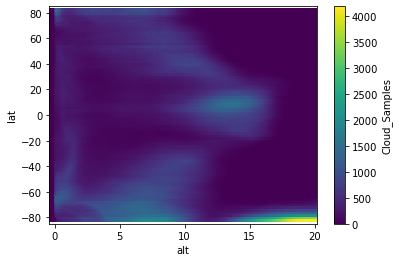

In [123]:
testds['Cloud_Samples'].mean('lon').plot()

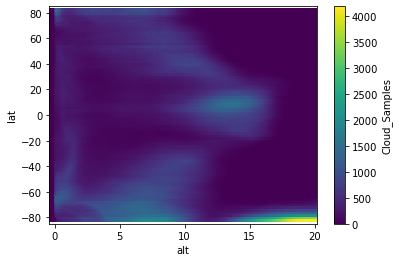

In [121]:
testds['Cloud_Samples'].mean('lon').plot()

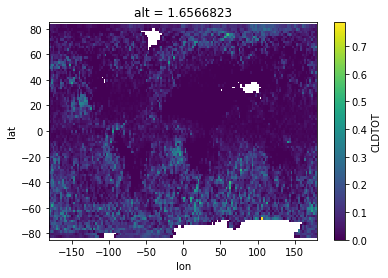

In [83]:
testds['CLDTOT'][:,:,34].plot()

In [72]:
testds.alt

<xarray.DataArray 'alt' (alt: 344)>
array([-0.380048, -0.320144, -0.26024 , ..., 20.047157, 20.107063, 20.166965],
      dtype=float32)
Coordinates:
  * alt      (alt) float32 -0.38 -0.3201 -0.2602 -0.2003 ... 20.05 20.11 20.17

In [67]:
var_dict

{'Cloud_Accepted_Samples': (('lat', 'lon', 'alt'),
  array([[[  nan,   nan,   nan, ...,   nan,   nan,   nan],
          [  nan,   nan,   nan, ...,   nan,   nan,   nan],
          [  nan,   nan,   nan, ...,   nan,   nan,   nan],
          ...,
          [  nan,   nan,   nan, ...,   nan,   nan,   nan],
          [  nan,   nan,   nan, ...,   nan,   nan,   nan],
          [  nan,   nan,   nan, ...,   nan,   nan,   nan]],
  
         [[   0.,    0.,    0., ..., 1468., 1468., 1468.],
          [   0.,    0.,    0., ..., 1542., 1542., 1542.],
          [   0.,    0.,    0., ..., 1610., 1610., 1610.],
          ...,
          [   0.,    0.,    0., ..., 1469., 1469., 1467.],
          [   0.,    0.,    0., ..., 1483., 1468., 1455.],
          [   0.,    0.,    0., ..., 1382., 1382., 1382.]],
  
         [[   0.,    0.,    0., ..., 1336., 1336., 1336.],
          [   0.,    0.,    0., ..., 1218., 1218., 1218.],
          [   0.,    0.,    0., ..., 1143., 1143., 1143.],
          ...,
          [

In [ ]:
var_dict = {}

In [65]:
testds = xr.Dataset(
    {"cloud_accpt": (('lat','lon','alt') ,data)},
    coords={
        'lat': lat,
        'lon': lon,
        'alt': alt,  
    },
)

SyntaxError: 'break' outside loop (<ipython-input-65-57283acb9061>, line 48)

In [57]:
data

array([[[  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        ...,
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan],
        [  nan,   nan,   nan, ...,   nan,   nan,   nan]],

       [[   0.,    0.,    0., ..., 1468., 1468., 1468.],
        [   0.,    0.,    0., ..., 1542., 1542., 1542.],
        [   0.,    0.,    0., ..., 1610., 1610., 1610.],
        ...,
        [   0.,    0.,    0., ..., 1469., 1469., 1467.],
        [   0.,    0.,    0., ..., 1483., 1468., 1455.],
        [   0.,    0.,    0., ..., 1382., 1382., 1382.]],

       [[   0.,    0.,    0., ..., 1336., 1336., 1336.],
        [   0.,    0.,    0., ..., 1218., 1218., 1218.],
        [   0.,    0.,    0., ..., 1143., 1143., 1143.],
        ...,
        [   0.,    0.,    0., ..., 1424., 1424., 1424.],
        [   0.,    0.,    0., ..., 1365., 133

In [15]:
Lon,Lat = np.meshgrid(lon,lat)

In [17]:
zmean = np.mean(data,axis=2)
zsum = np.sum(data,axis=2)

In [62]:
test2 = np.mean(data,axis=1)

In [63]:
test2.shape

(85, 344)

In [ ]:
plt.plot()

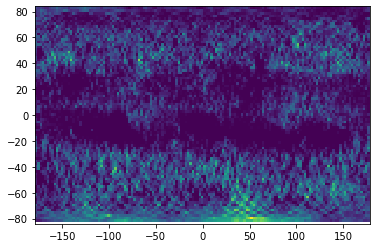

In [58]:
plt.pcolor(Lon,Lat, data[:,:,160])

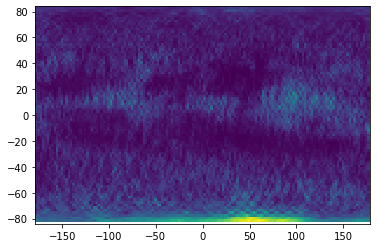

In [19]:
plt.pcolor(Lon,Lat, zsum)

In [30]:
lat

array([-84., -82., -80., -78., -76., -74., -72., -70., -68., -66., -64.,
       -62., -60., -58., -56., -54., -52., -50., -48., -46., -44., -42.,
       -40., -38., -36., -34., -32., -30., -28., -26., -24., -22., -20.,
       -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,
         4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,
        26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,
        70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.], dtype=float32)

In [34]:
alt.shape

(344,)

In [35]:
testds = xr.Dataset(
    {"cloud_accpt": (('lat','lon','alt') ,data)},
    coords={
        'lat': lat,
        'lon': lon,
        'alt': alt,  
    },
)

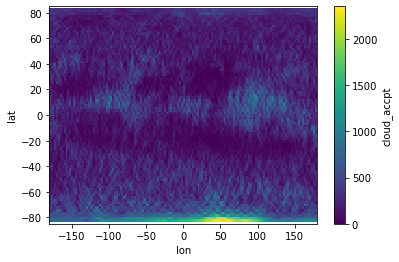

In [37]:
testds['cloud_accpt'].mean(dim='alt').plot()

In [24]:
ds = xr.Dataset(
    {"foo": (("x", "y"), np.random.rand(4, 5))},
    coords={
        "x": [10, 20, 30, 40],
        "y": pd.date_range("2000-01-01", periods=5),
        "z": ("x", list("abcd")),
    },
)

ValueError: x and y must be the same size

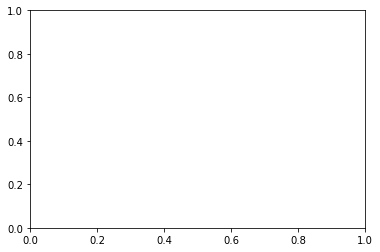

In [64]:
plt.scatter(lon, lat, c=data, s=1, cmap=plt.cm.jet,
          edgecolors=None, linewidth=0)
cb = m.colorbar()
cb.set_label(units)

In [36]:
latitude[:]

array([-84., -82., -80., -78., -76., -74., -72., -70., -68., -66., -64.,
       -62., -60., -58., -56., -54., -52., -50., -48., -46., -44., -42.,
       -40., -38., -36., -34., -32., -30., -28., -26., -24., -22., -20.,
       -18., -16., -14., -12., -10.,  -8.,  -6.,  -4.,  -2.,   0.,   2.,
         4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,  24.,
        26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,
        70.,  72.,  74.,  76.,  78.,  80.,  82.,  84.], dtype=float32)

In [32]:
np.where(invalid, np.nan, data)

array([[  nan,   nan,   nan, ...,   nan,   nan,   nan],
       [   0.,    0.,    0., ..., 1468., 1468., 1468.],
       [   0.,    0.,    0., ..., 1336., 1336., 1336.],
       ...,
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [   0.,    0.,    0., ...,    0.,    0.,    0.],
       [  nan,   nan,   nan, ...,   nan,   nan,   nan]])

In [20]:
invalid

array([[ True,  True,  True, ...,  True,  True,  True],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [ True,  True,  True, ...,  True,  True,  True]])

In [45]:
invalid.shape

(85, 144, 344)

In [19]:
np.reshape(invalid,(85*344,))

array([ True,  True,  True, ...,  True,  True,  True])

In [14]:
np.where(data[invalid])

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [29]:
np.where(data[invalid])[0].shape

(688,)

In [ ]:
m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
m.scatter(lon, lat, c=data, s=1, cmap=plt.cm.jet,
          edgecolors=None, linewidth=0)
cb = m.colorbar()
cb.set_label(units)

basename = os.path.basename(FILE_NAME)
# There is no long_name attribute on dataset.
longname = DATAFIELD_NAME
plt.title('{0}\n{1}'.format(basename, longname))
plt.show()

In [ ]:
"""
Copyright (C) 2018 The HDF Group

This example code illustrates how to access and visualize a LaRC CALIPSO file 
in file in Python.

If you have any questions, suggestions, or comments on this example, please use
the HDF-EOS Forum (http://hdfeos.org/forums).  If you would like to see an
example of any other NASA HDF/HDF-EOS data product that is not listed in the
HDF-EOS Comprehensive Examples page (http://hdfeos.org/zoo), feel free to
contact us at eoshelp@hdfgroup.org or post it at the HDF-EOS Forum
(http://hdfeos.org/forums).

Usage:  save this script and run

    python CAL_LID_L2_05kmAPro-Standard-V4-10.2007-03-06T09-29-19ZD.hdf.py

The HDF file must be in your current working directory.

Last Update: 2018-02-15
"""
import os
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.basemap import Basemap
from matplotlib import colors
from pyhdf.SD import SD, SDC

DATAFIELD_NAME = 'Column_Optical_Depth_Cloud_532'
FILE_NAME = 'CAL_LID_L2_05kmAPro-Standard-V4-10.2007-03-06T09-29-19ZD.hdf'
hdf = SD(FILE_NAME, SDC.READ)
        
# Read dataset.
data2D = hdf.select(DATAFIELD_NAME)
data = data2D[:,0]

# Read attributes.
attrs = data2D.attributes(full=1)
fva=attrs["fillvalue"]
_FillValue = fva[0]
ua=attrs["units"]
units = ua[0]

vra=attrs["valid_range"]
vra_str = vra[0]

# Valid attribute is string '0.0...25.0'.
smin, smax = vra_str.split("...")
valid_min = float(smin)
valid_max = float(smax)

invalid = np.logical_or(data > valid_max,
                        data < valid_min)
invalid = np.logical_or(invalid, data == _FillValue)
data[invalid] = np.nan

# Read geolocation datasets.
latitude = hdf.select('Latitude')
lat = latitude[:,0]

longitude = hdf.select('Longitude')
lon = longitude[:,0]

m = Basemap(projection='cyl', resolution='l',
            llcrnrlat=-90, urcrnrlat=90,
            llcrnrlon=-180, urcrnrlon=180)
m.drawcoastlines(linewidth=0.5)
m.drawparallels(np.arange(-90, 91, 45))
m.drawmeridians(np.arange(-180, 180, 45), labels=[True,False,False,True])
m.scatter(lon, lat, c=data, s=1, cmap=plt.cm.jet,
          edgecolors=None, linewidth=0)
cb = m.colorbar()
cb.set_label(units)

basename = os.path.basename(FILE_NAME)
# There is no long_name attribute on dataset.
longname = DATAFIELD_NAME
plt.title('{0}\n{1}'.format(basename, longname))
plt.show()

In [ ]:
fig = plt.gcf()

pngfile = "{0}.py.png".format(basename)
fig.savefig(pngfile)